In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 파일 열기

In [24]:
imdb = pd.read_csv('movie_metadata.csv')
imdb.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


### 칼럼 확인
- numeric feature

'gross' 수입  'budget' 예산
'num_critic_for_reviews' 리뷰 수 'duration' (상영)기간
'director_facebook_likes' 감독 페이스북 좋아요 수
'actor_3_facebook_likes' 배우3 페이스북 좋아요 수
'actor_1_facebook_likes' 배우 1 페이스북 좋아요 수 
'num_voted_users' 투표한 유저 수 'num_user_for_reviews' 리뷰한 유저 수
'cast_total_facebook_likes' 배우들의 total 좋아요 수 
'actor_2_facebook_likes' 배우 2 페이스북 좋아요 수
'imdb_score' IMDB 점수 'aspect_ratio' 기대점수
'movie_facebook_likes' 영화 페이스북 좋아요 수


- category feature

'color' 색깔 'director_name' 감독명 'actor_2_name' 배우 2 이름
'genres' 장르 'actor_1_name' 배우 1 이름
'movie_title' 영화 제목 'actor_3_name' 배우 3 이름
'plot_keywords' 줄거리 키워드
'movie_imdb_link' movie imdb 링크  'language' 언어 'country' 국가
'content_rating' 등급 'title_year' 연도 'facenumber_in_poster' 포스터 등장 인물

In [6]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [14]:
# 흑백인지, color 인지, Nan값도 존재함
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [10]:
# facenumber_in_poster 가 뭐지? -> 포스터 얼굴 수!!
imdb['facenumber_in_poster'].value_counts()

0.0     2152
1.0     1251
2.0      716
3.0      380
4.0      207
5.0      114
6.0       76
7.0       48
8.0       37
9.0       18
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
19.0       1
14.0       1
31.0       1
43.0       1
Name: facenumber_in_poster, dtype: int64

In [43]:
imdb.isnull().any() # True 일 경우 Nan 값 있는 것.

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

### Data Summary

In [56]:
total_movie = len(imdb) # 영화이름 unique 값은 중복명이 있으므로 ㄴㄴ
total_director = len(imdb['director_name'].unique())
print ("Total movies : {}".format(total_movie))
print ("Total directors : {}".format(total_director))
print ("Average gross :{}".format(round(imdb['gross'].mean(),2)))

Total movies : 5043
Total directors : 2399
Average gross :48468407.53


### Data Visualizing

1.영화, 배우 좋아요 수와 수입은 관계가 있을까?

C:\Python3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


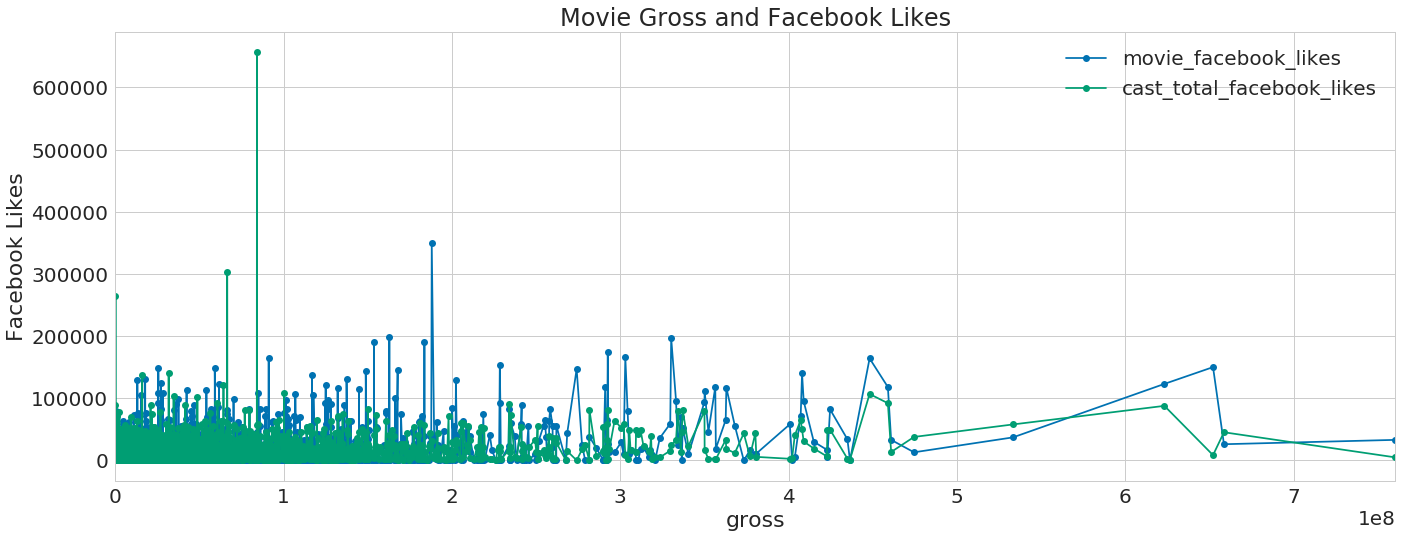

In [70]:
sns.set(style="whitegrid", palette="colorblind", font_scale=2, rc={'font.family':'NanumGothic'})

imdb.groupby('gross').agg({'movie_facebook_likes':np.mean, 'cast_total_facebook_likes':np.mean}).plot(figsize=(20,8), title = "Movie Gross and Facebook Likes", marker='o')
plt.ylabel('Facebook Likes')
plt.tight_layout()
plt.show()

2.예산이 높을수록 흥행 수입이 클까?

1. 필요한 순서대로 칼럼 정리
2. 그래프 그려서 어느정도 상관관계 봄
3. 필요없는 변수 빼기 (index level 로 내리기)
4. nan 값 정리
5. 모델 여러개 돌리기 - 분석 주제 다각화
6. 무슨 모델인지 보기